# Point Insertion Algorithm

Given is a set $S$ of points on a 2D plane. First create a rectangular domain, that is composed of two triangles, which contain all points.

To do:
- Create a smart data structure that contains all triangles (e.g. another quadtree)
- Create a routine to check wether a point lies in the circumcirle of a triangle
- Create a function to determine the convex hull of a given pointset

In [50]:
import math as mt

class Triangle:
    '''
    Class describes a triangle on a 2D plane. 
    The triangle vertices are defined in CCW direction.
    The triangle neighbours are defined on the opposite direction 
    of the vertices.
                    V1
                   /  \
              NB3 /    \ NB2
                 /      \
                /________\
               V2  NB1    V3
               
    Attributes:
    -----------
    ID: Triangle ID for recognition 
    vertices: tuple containing three pointers to vertices 
              which define the triangle
    neighbours: tuple containing three pointers to the 
                neighbouring triangles
                --> None if no neighbour to an edge
    area: triangle area (float)
    edgelengths = tuple (s1, s2, s3) of the triangles edge lenghts
               
    '''
    def __init__(self, ID, vertices, neighbours):
        self.ID = ID
        self.vertices = vertices
        self.neighbours = neighbours
        self.area = self.calcArea()
        self.edgelengths = self.calcEdgelengths()

    
    def calcEdgelengths(self):
        '''Calculates the triangles edgelengths'''
        v = self.vertices
        s = ()
        for i in range(0,3):
            s += mt.sqrt((v[(i+1)%2].x - v[i].x)**2 + (v[(i+1)%2].y - v[i].y)**2),
        print(s)
        # Check area through herons formular
        sh = 0.5 * (s[0]+s[1]+s[2])
        A = mt.sqrt(sh*(sh-s[0])*(sh-s[1])*(sh-s[2]))
        print(self.area - A)
        return s
                                   
    def calcArea(self):
        '''Calculates the triangle area'''
        b = (self.vertices[1].x - self.vertices[0].x,
             self.vertices[1].y - self.vertices[0].y)
        c = (self.vertices[2].x - self.vertices[0].x,
             self.vertices[2].y - self.vertices[0].y)
        area = 0.5 * (b[0]*c[1] - c[0]*b[1])
        
        # Re-orientation of triangle for negative areas
        # --> CCW definition
        if (area < 0.0):
            self.vertices = self.vertices[::-1]
            area = -area

            
        return area
        

class DelaunayTriangulation:
    def __init__(self, points):
        self.pts = points
        self.pts_qTree = PointQuadtree(points)
        
        # Create T0: rectangular domain composed of two triangles,
        # large enough to contain all points
        T0 = Triangle(0, 
                      (points[self.pts_qTree.bbox_IDs[0]],
                      points[self.pts_qTree.bbox_IDs[1]],
                      points[self.pts_qTree.bbox_IDs[2]]),
                      (None, None, None))
        T1 = Triangle(1, 
                      (points[self.pts_qTree.bbox_IDs[2]],
                      points[self.pts_qTree.bbox_IDs[3]],
                      points[self.pts_qTree.bbox_IDs[0]]),
                      (-1, T0, -1))
        T1.neighbours = (None, T1, None)
        self.triangles = [T0, T1]

        

        

In [51]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

from data_structure import *

# Plot data
#------------------------------------------------
Nrad = 10
Ntan = 15
ang = 0.5
rad = 1.45

points = global_points((Nrad,Ntan), rad, ang)
DT = DelaunayTriangulation(points) 
DT.triangles[0].area


(1.8425377393095976, 1.8425377393095976, 1.8413171361720495)
0.2269433013690083
(1.8425377393095976, 1.8425377393095976, 1.8413171361720495)
0.2269433013690083


1.6963481567172354

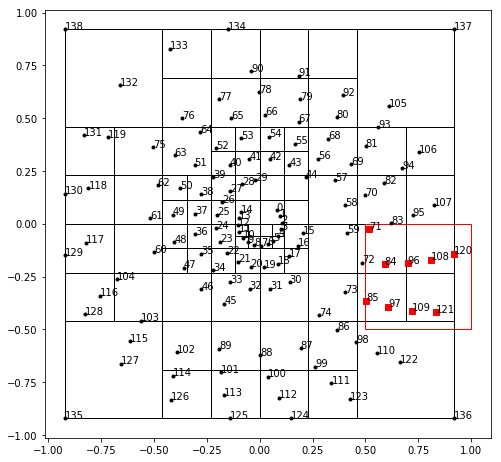

In [52]:
# Plot data
#------------------------------------------------
Nrad = 10
Ntan = 15
ang = 0.5
rad = 1.45

points = global_points((Nrad,Ntan), rad, ang)
qTree  = PointQuadtree(points)

rangeC = (0.75, -0.25)
rangeW = 0.5
rangeH = 0.5
ptsInRange = qTree.getPointsInRange(rangeC, rangeW, rangeH)

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
for ind, p in enumerate(points):
    ax.plot(p.x, p.y,ls='None', marker='.', c='k')
    ax.text(p.x, p.y, p.ID)
    
patches = []
qTree.plotQuadTree(patches)
collection = PatchCollection(patches, facecolors='none', edgecolors='k')
ax.add_collection(collection)



rect = mpatches.Rectangle((rangeC[0]-0.5*rangeW,
                           rangeC[1]-0.5*rangeH), 
                           rangeW, rangeH, 
                           fc='none', ec='r', fill=0)
ax.add_patch(rect)

for p in ptsInRange:
    ax.plot(p.x, p.y, ls='None', marker='s', c='r')
#ax.plot(np.array(ptsInRange)[:,0],np.array(ptsInRange)[:,1], ls='None', marker='s', c='r')

plt.show()



In [6]:
qTree.x_bbox

[-0.9212688696547996, 0.9212688696547982]

In [32]:
s = ()
s += 1,
s += 2,
print(s)

(1, 2)


In [36]:
(1+1)%2

0